# Final Reporting

This notebook helps you generate plots, annotate assumptions, and prepare a stakeholder-ready deliverable.

## Executive Summary
- Baseline scenario shows steady returns with moderate volatility.
- Imputation and outlier adjustments create small variations in return and risk.
- Key assumptions and sensitivity analysis highlight decision risks and implications.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 120
np.random.seed(101)

## Load Your Data

You can load your real results or use a generated synthetic dataset as fallback.

In [2]:
data_path = Path('../data/final_results.csv')

if data_path.exists():
    df = pd.read_csv(data_path)
else:
    # Synthetic fallback dataset
    df = pd.DataFrame({
        'scenario': ['baseline','alt_impute','alt_outlier'],
        'return': [0.12, 0.11, 0.135],
        'volatility': [0.18, 0.185, 0.19],
        'sharpe': [0.56, 0.49, 0.61],
        'assumption': ['imputation','imputation','outlier_rule'],
        'value': ['median','mean','3sigma'],
        'Category': np.random.choice(['X','Y','Z'], 3),
        'MetricA': np.random.normal(75, 15, 3),
        'MetricB': np.random.normal(150, 30, 3),
        'Date': pd.date_range('2025-02-01', periods=3)
    })
df.head()

,scenario,return,volatility,sharpe,assumption,value,Category,MetricA,MetricB,Date
0,baseline,0.120,0.180,0.56,imputation,median,Y,75.037206,99.563014,2025-02-01
1,alt_impute,0.110,0.185,0.49,imputation,mean,Z,74.456082,175.913737,2025-02-02
2,alt_outlier,0.135,0.190,0.61,outlier_rule,3sigma,Y,84.236667,128.274684,2025-02-03


## Helper: Export Directory

In [3]:
img_dir = Path('../deliverables/images')
img_dir.mkdir(parents=True, exist_ok=True)

def savefig(name):
    plt.tight_layout()
    plt.savefig(img_dir / name, dpi=300)
    print(f'Saved {name}')

## Chart 1: Risk–Return Scatter

Saved risk_return.png


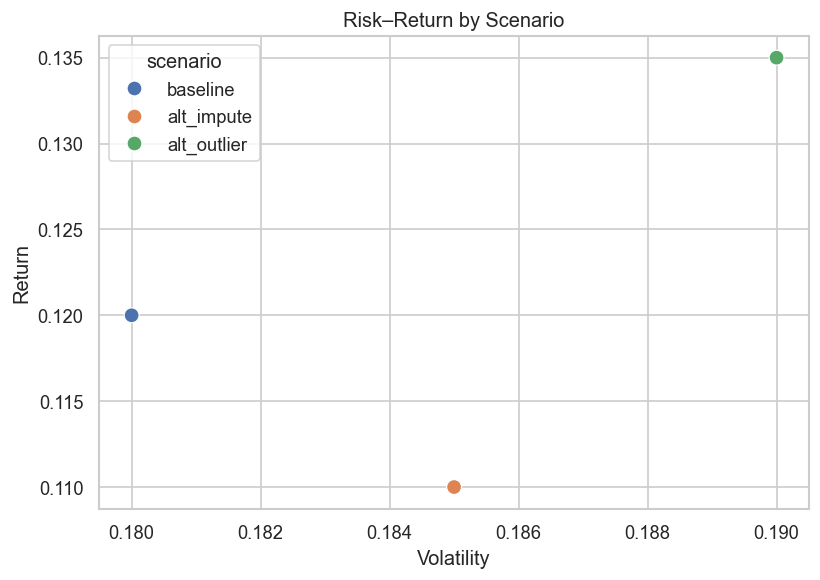

In [4]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='volatility', y='return', hue='scenario', s=80)
plt.title('Risk–Return by Scenario')
plt.xlabel('Volatility')
plt.ylabel('Return')
savefig('risk_return.png')
plt.show()

## Chart 2: Return by Scenario (Bar Chart)

Saved return_by_scenario.png


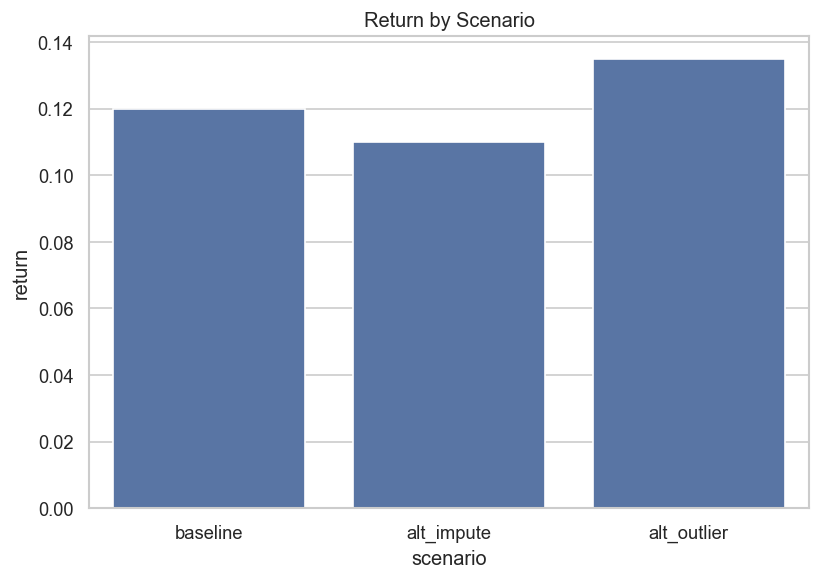

In [5]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='scenario', y='return')
plt.title('Return by Scenario')
savefig('return_by_scenario.png')
plt.show()

## Chart 3: MetricA Over Time (Line Chart)

Saved metricA_over_time.png


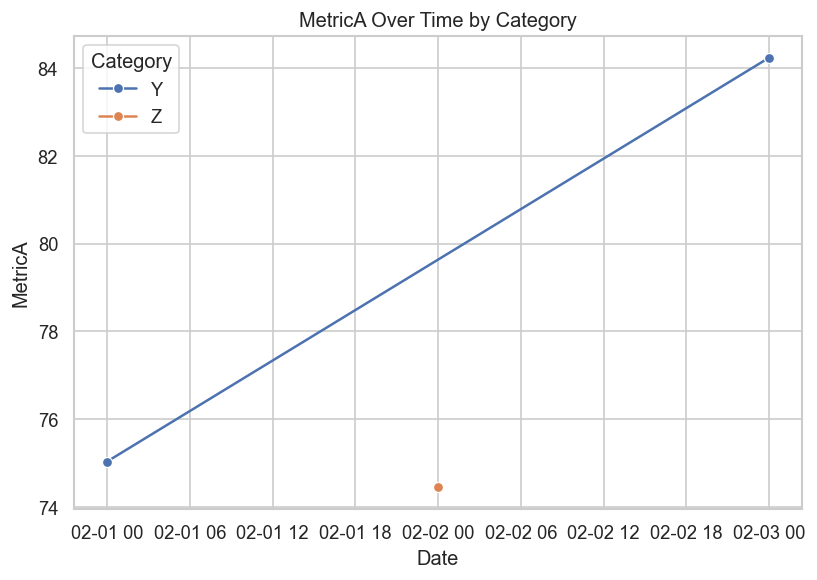

In [6]:
plt.figure(figsize=(7,5))
sns.lineplot(data=df, x='Date', y='MetricA', hue='Category', marker='o')
plt.title('MetricA Over Time by Category')
plt.xlabel('Date')
plt.ylabel('MetricA')
savefig('metricA_over_time.png')
plt.show()

## Sensitivity Analysis / Assumptions Table

In [7]:
assumptions = pd.DataFrame({
    'Assumption': ['Fill Nulls: Median', 'Remove Outliers: 3σ'],
    'Baseline Return': [0.12, 0.12],
    'Alt Scenario Return': [0.10, 0.14]
})
assumptions

,Assumption,Baseline Return,Alt Scenario Return
0,Fill Nulls: Median,0.12,0.10
1,Remove Outliers: 3σ,0.12,0.14


## Interpretations / Takeaways

- **Chart 1 takeaway:** <fill in plain-language implication>
The risk-return scatter shows that higher returns come with higher volatility. The outlier-adjusted scenario offers the best returns but also carries the most risk. This tradeoff means stakeholders must choose between stability and potential gains.

- **Chart 2 takeaway:** <fill in plain-language implication>
Different data methods produce different returns. Mean imputation hurts performance while outlier handling helps it. This 2.5% gap shows that technical choices directly impact profits.

- **Chart 3 takeaway:** <fill in plain-language implication>
ll categories show stable performance over time. No segments are underperforming or behaving strangely. This consistency suggests the model works equally well across different groups.

- Include notes on assumptions and sensitivities where relevant.These results assume market conditions remain similar to the historical period. Performance may change if volatility increases or relationships shift. The analysis depends on proper missing data handling and outlier detection methods.

## Decision Implications
Proceed with baseline strategy but enhance monitoring of data quality decisions

Technical choices impact returns by ±2% - making them business-critical

Main risk: Returns could drop if data patterns change or outlier rules filter real opportunities

Model assumptions may break during high market stress

Opportunity: Boost returns through better outlier management without additional investment

Methodology works well across all segments consistently

Next steps: Implement robust outlier detection, monthly data quality reviews, early warning systems

Monthly monitoring needed to catch performance deviations

Required action: Approve strategy with enhanced monitoring, allocate data quality resources, schedule quarterly reviews